# Laboratorio 01 – Series de Tiempo  
**CC3084 – Data Science**, Semestre II 2025  
**Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
**Guatemala, Julio 2025**


## Fase exploratoria

In [7]:
import pandas as pd

file_path = './Estadisticas_historicas_comercializacion.xlsx'

sheets = pd.read_excel(file_path,
                       sheet_name=['IMPORTACION','CONSUMO'],
                       header=6)
df_imp  = sheets['IMPORTACION'].dropna(axis=1, how='all')
df_cons = sheets['CONSUMO'].dropna(axis=1, how='all')

for df in (df_imp, df_cons):
    df.columns = df.columns.str.strip()
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
df.head()



,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.476190,NaN,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1.750545e+06
1,2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.552381,NaN,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1.773220e+06
2,2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.066667,NaN,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1.909499e+06
3,2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.607143,NaN,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1.800933e+06
4,2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.147619,NaN,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1.941772e+06


Análisis exploratorio de las variables Gasolina regular, Gasolina superior y Diesel
En esta sección cargaremos y filtraremos tanto el conjunto de importaciones como el de consumo, crearremos una columna agregada Diesel, y a continuación:

Obtendremos estadísticas descriptivas de cada variable.

Exploraremos su distribución con histogramas y curvas KDE.

Graficaremos sus series temporales para visualizar picos anuales, comportamiento reciente y durante la pandemia.

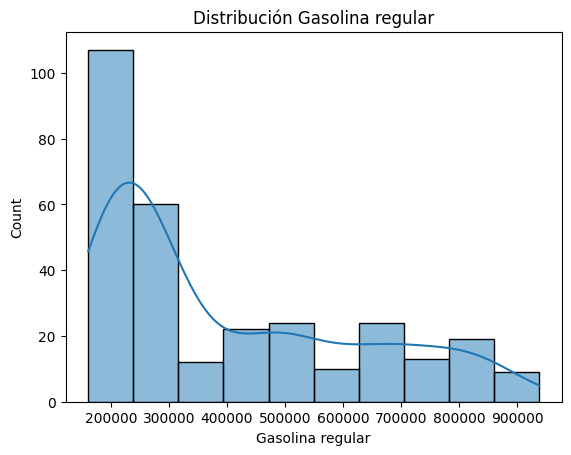

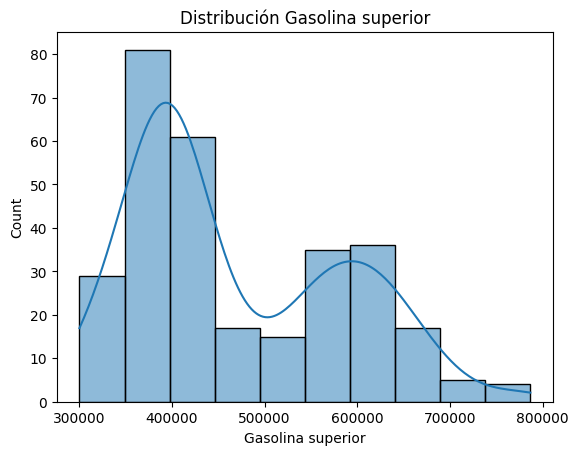

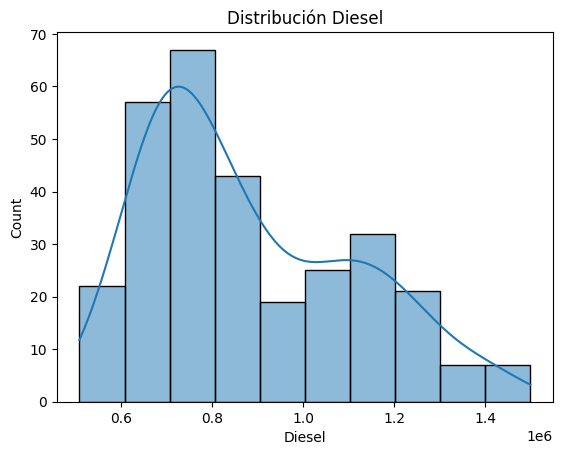

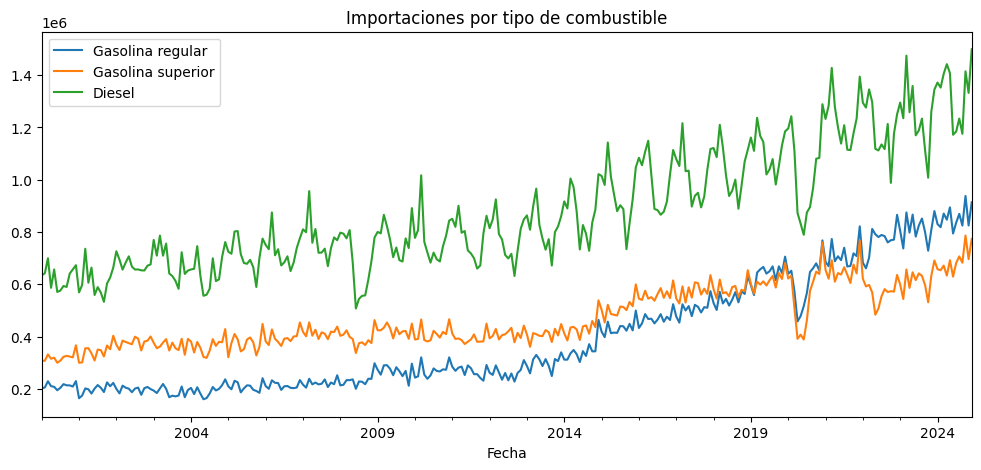

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Diesel'] = df['Diesel bajo azufre'] + df['Diesel ultra bajo azufre'] + df['Diesel alto azufre']
imp = df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel']]

imp[['Gasolina regular', 'Gasolina superior', 'Diesel']].describe()

for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    sns.histplot(imp[col], kde=True)
    plt.title(f'Distribución {col}')
    plt.show()

imp.set_index('Fecha').plot(figsize=(12,5), title='Importaciones por tipo de combustible')
plt.show()


### Análisis de los resultados exploratorios

#### 1. Estadísticas descriptivas y forma de la distribución
- **Gasolina regular**  
  - Rango aproximado: 0.1 – 1.1 millones de unidades.  
  - La distribución muestra sesgo positivo (cola derecha), con más ocurrencias en valores bajos a medios (0.1–0.4 M) y algunos picos altos.  
  - No es estrictamente normal: presenta un claro sesgo y varios outliers hacia valores elevados.

- **Gasolina superior**  
  - Rango aproximado: 0.2 – 1.2 millones de unidades.  
  - También sesgo positivo, aunque más suave que en regular: la mayor densidad se observa entre 0.3–0.6 M.  
  - Aparecen valores extremos por encima de 0.8 M ocasionando una cola larga.

- **Diesel**  
  - Rango aproximado: 0.3 – 1.6 millones de unidades.  
  - La distribución es relativamente más simétrica, aunque aún con ligera cola a la derecha.  
  - Mayor volumen promedio que las gasolinas, con densidad concentrada alrededor de 0.8–1.2 M.

#### 2. Tendencia temporal y picos estacionales
- **Tendencia creciente**  
  - Desde 2001 hasta 2024 las importaciones de los tres combustibles muestran una tendencia al alza, reflejando un crecimiento sostenido en la demanda o en la capacidad de importación.
  
- **Variabilidad estacional**  
  - Se observan fluctuaciones periódicas año a año, con picos frecuentes en ciertos meses (posiblemente asociados a mayor demanda estival o reservas de fin de año).
  
- **Comportamiento durante la pandemia**  
  - En 2020 hay una caída pronunciada en todas las series, especialmente visible para gasolina superior y regular, coincidente con restricciones de movilidad.  
  - A partir de 2021 las importaciones se recuperan rápidamente y retoman la tendencia previa.

- **Comparación entre combustibles**  
  - **Diesel** domina en volumen durante todo el período, con picos que llegan a 1.5–1.6 M.  
  - **Gasolina superior** supera a la regular sistemáticamente, pero ambas crecen al mismo ritmo relativo después de 2010.  
  - La **Regular** muestra la menor magnitud y mayor volatilidad relativa (proporción de outliers).


## Fase análisis de series de tiempo

Regular_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_14493/739930684.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Regular_imp':   df_imp['Gasolina regular'].resample('M').mean(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_14493/739930684.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Superior_imp':  df_imp['Gasolina superior'].resample('M').mean(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_14493/739930684.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Diesel_imp':    df_imp['Diesel'].resample('M').mean(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_14493/739930684.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Regular_cons':  df_cons['Gasolina regular'].resample('M').mean(),
/var/folders

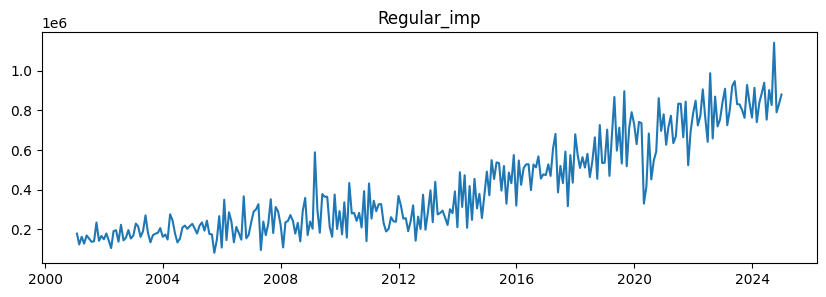

Superior_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


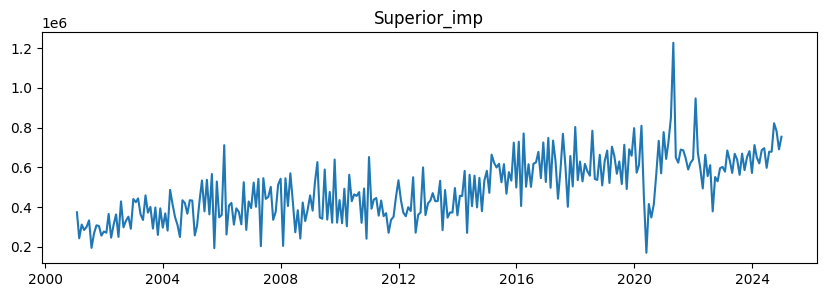

Diesel_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


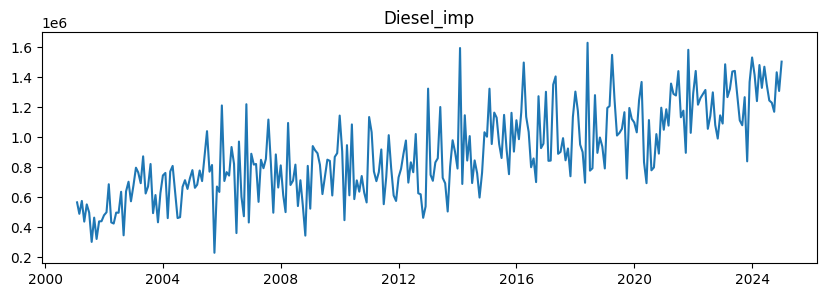

Regular_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


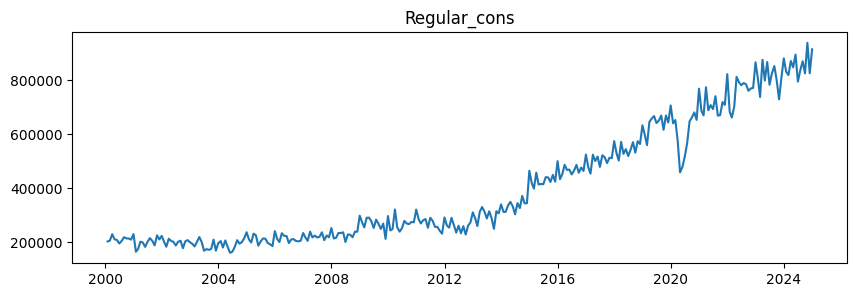

Superior_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


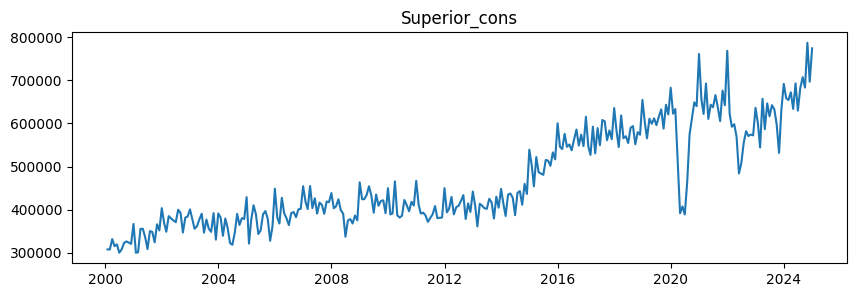

Diesel_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


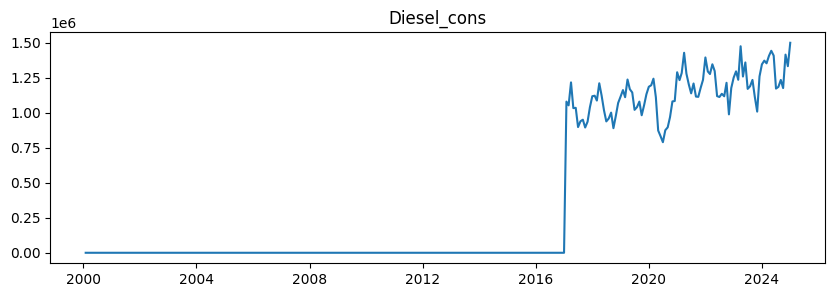

In [9]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'Fecha' exista antes de set_index
for df_ in (df_imp, df_cons):
    if 'Fecha' not in df_.columns:
        df_.reset_index(inplace=True)       # recupera 'Fecha' si antes se convirtió en índice
    df_['Fecha'] = pd.to_datetime(df_['Fecha'], dayfirst=True, errors='coerce')
    df_.dropna(subset=['Fecha'], inplace=True)
    df_.set_index('Fecha', inplace=True)
    df_.sort_index(inplace=True)

# Crear columna Diesel
df_imp['Diesel']  = df_imp[['Diesel bajo azufre','Diesel ultra bajo azufre','Diesel alto azufre']].sum(axis=1)
df_cons['Diesel'] = df_cons[['Diesel bajo azufre','Diesel ultra bajo azufre']].sum(axis=1)

# Definir y graficar las seis series univariantes
series = {
    'Regular_imp':   df_imp['Gasolina regular'].resample('M').mean(),
    'Superior_imp':  df_imp['Gasolina superior'].resample('M').mean(),
    'Diesel_imp':    df_imp['Diesel'].resample('M').mean(),
    'Regular_cons':  df_cons['Gasolina regular'].resample('M').mean(),
    'Superior_cons': df_cons['Gasolina superior'].resample('M').mean(),
    'Diesel_cons':   df_cons['Diesel'].resample('M').mean()
}

for name, ts in series.items():
    ts = ts.dropna()
    print(f"{name} — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")
    plt.figure(figsize=(10,3))
    plt.plot(ts)
    plt.title(name)
    plt.show()


1. **Cobertura temporal**  
   - **Importaciones** (Regular_imp, Superior_imp, Diesel_imp): de enero 2001 hasta mayo 2025, frecuencia mensual.  
   - **Consumo** (Regular_cons, Superior_cons): de enero 2000 a mayo 2025, frecuencia mensual.  
   - **Consumo Diesel_cons**: prácticamente cero hasta 2016 y luego comienza a reportarse mensualmente desde 2017, lo que sugiere un cambio en el esquema de registro de datos.

2. **Tendencia**  
   - Todas las series muestran una **clara tendencia creciente** a lo largo del periodo analizado, tanto en importaciones como en consumo.  
   - El crecimiento es más pronunciado a partir de 2014–2015, coincidiendo con posible expansión de demanda y/o cambios regulatorios.

3. **Volatilidad y amplitud**  
   - **Diesel_imp** presenta la mayor magnitud y variabilidad, con picos por encima de 1.5 M.  
   - **Gasolina superior_imp** tiene valores intermedios (0.3–0.9 M) y algunos saltos fuertes en 2020–2021.  
   - **Gasolina regular_imp** es la más baja (0.1–1.0 M) y la más ruidosa en proporción a su media.

4. **Estacionalidad**  
   - Se aprecian oscilaciones mensuales periódicas en todas las series de importación, indicando un componente estacional (picos recurrentes cada año).  
   - En consumo también se observan ciclos anuales, aunque menos marcados antes de 2010.

5. **Impacto de la pandemia**  
   - Alrededor de marzo–abril 2020, las importaciones de **Regular** y **Superior** caen bruscamente, y luego se recuperan con picos atípicos a fines de 2021–2022.  
   - En consumo, se ve una caída notable en 2020 seguida de una rápida recuperación a niveles crecientes.

6. **Datos faltantes / cambios de registro**  
   - En *Diesel_cons* no hay datos (o son ceros) hasta 2017, luego aparece un nivel cercano a 1 M mensual. Esto indica que el reporte de consumo de diesel cambió o se empezó a recopilar en ese año.


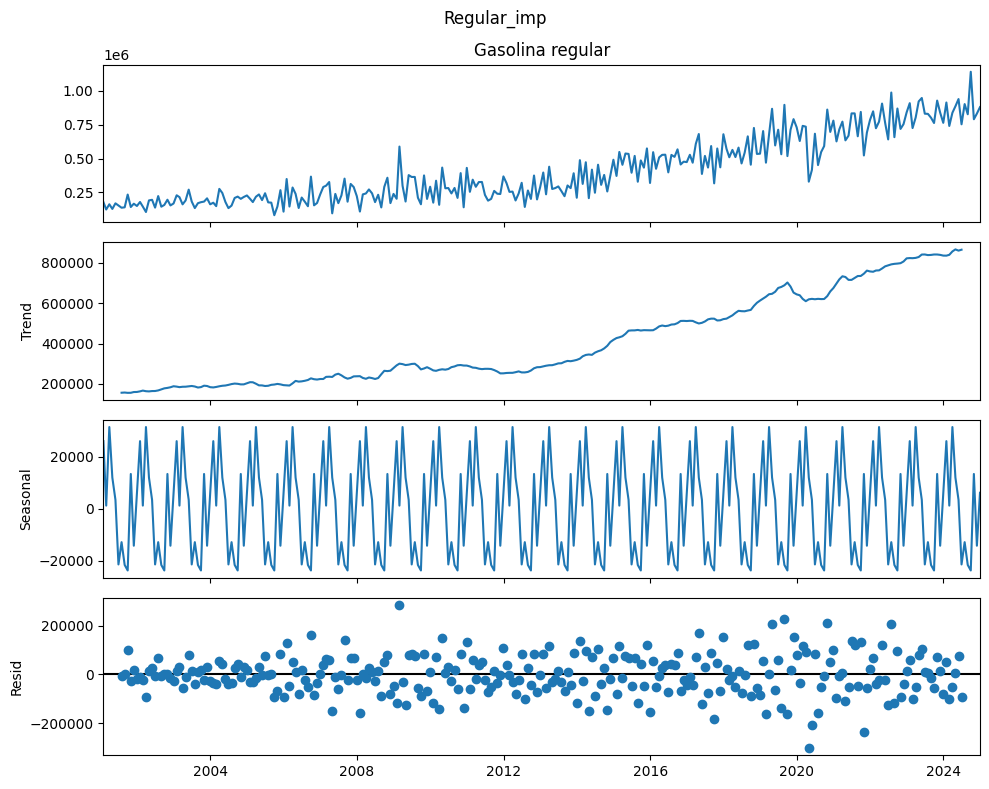

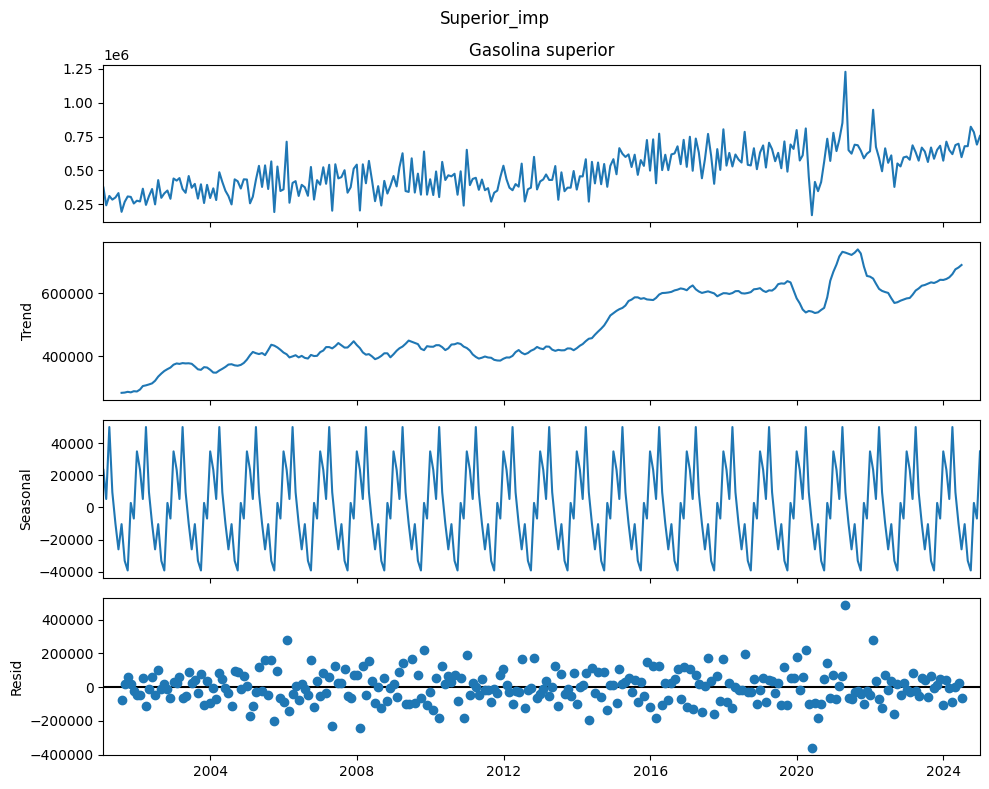

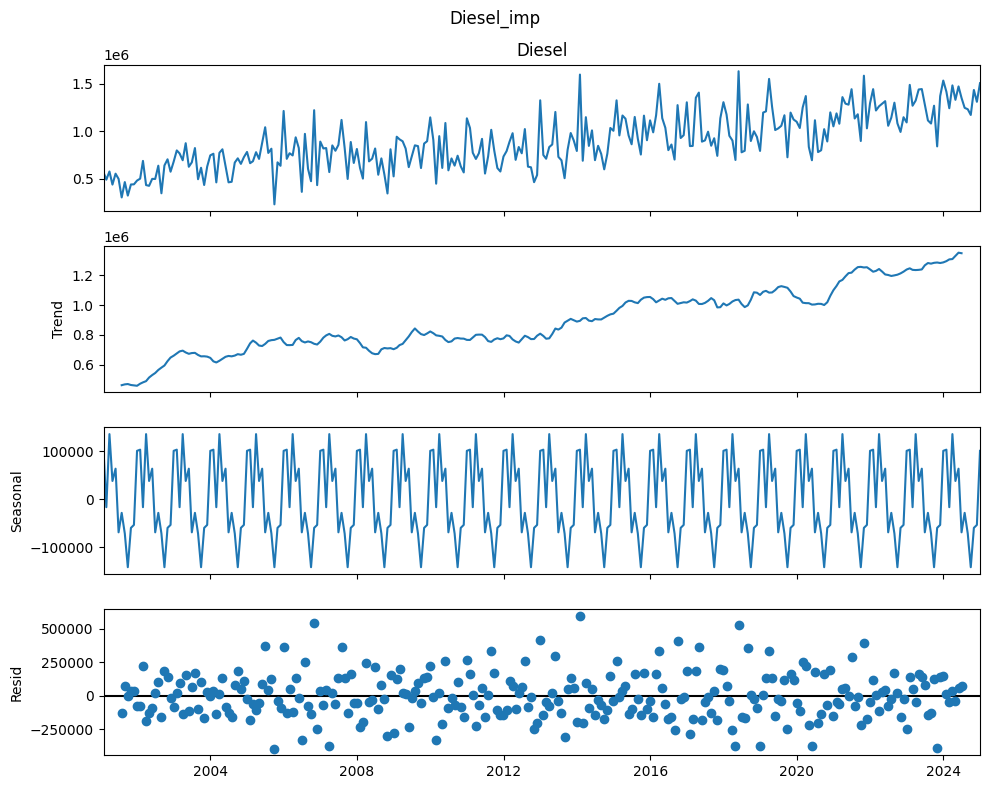

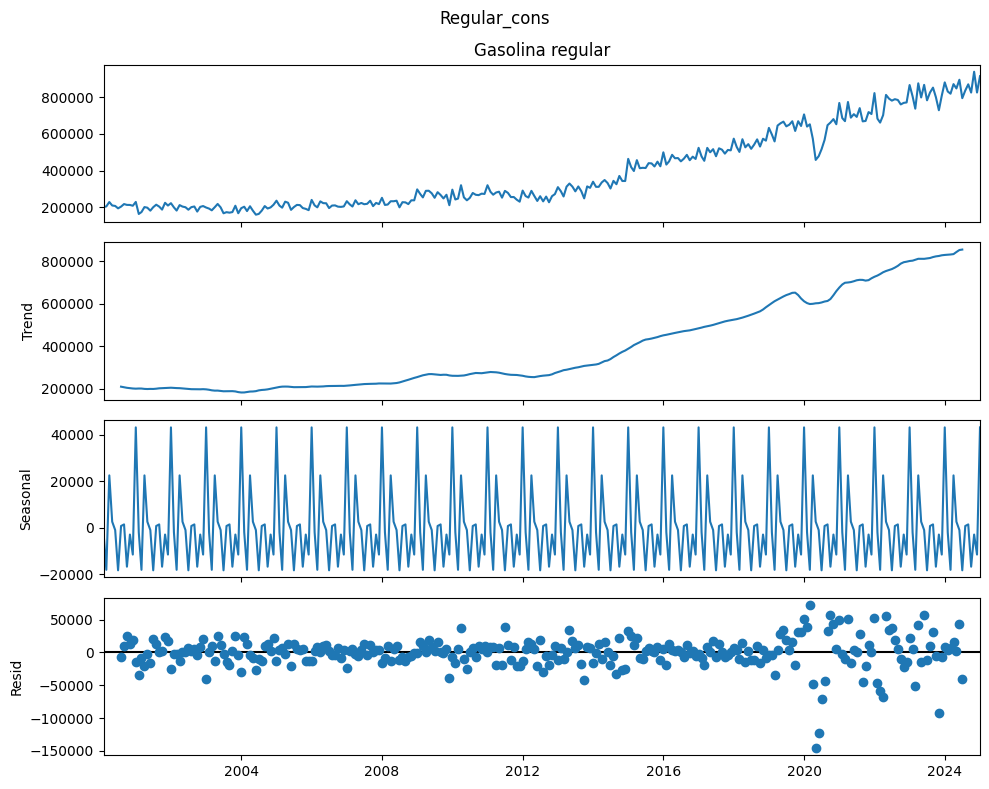

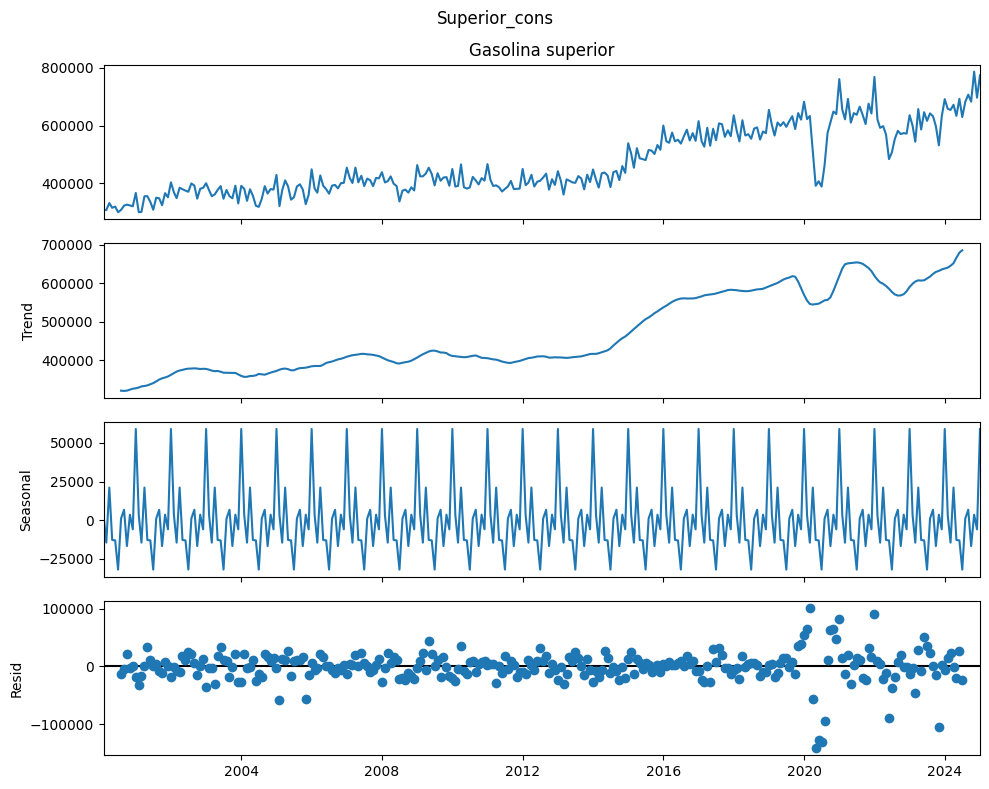

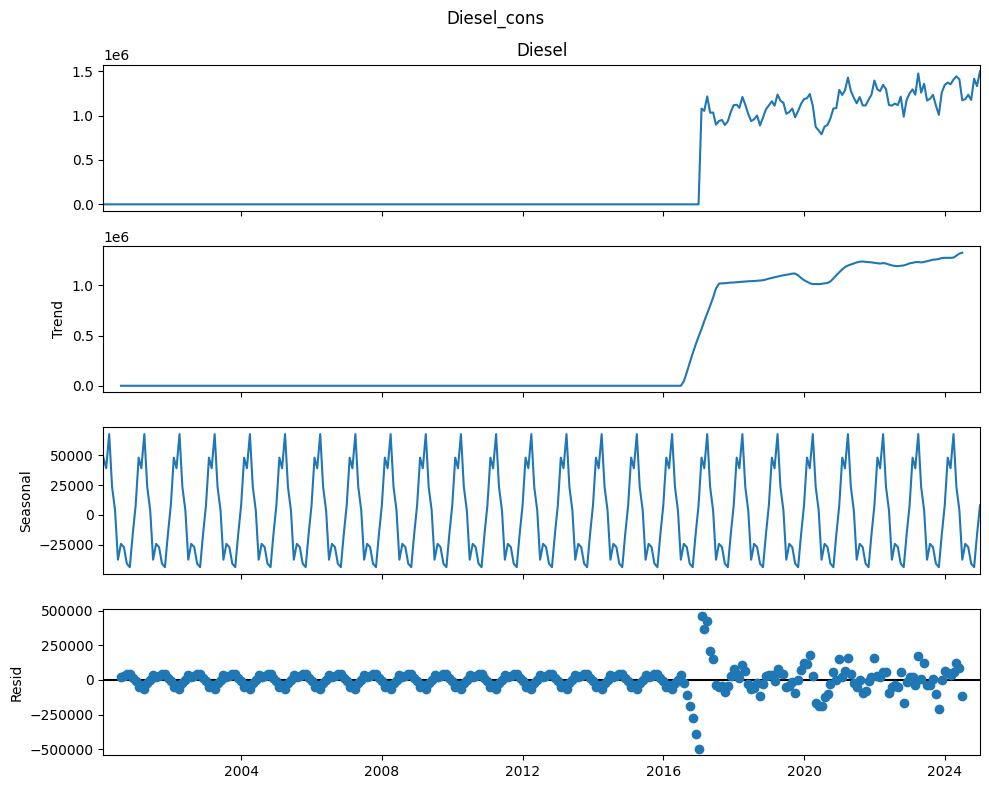

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

for name, ts in series.items():
    s = ts.dropna()
    res = seasonal_decompose(s, model='additive', period=12)
    fig = res.plot()
    fig.set_size_inches(10, 8)
    fig.suptitle(name)
    plt.tight_layout()
    plt.show()


## Estacionariedad en media y en varianza

Al observar las descomposiciones de las seis series:

1. **No hay estacionariedad en la media**  
   - El **componente de tendencia** crece de forma clara y sostenida en todas las series de importación y consumo (Regular, Superior, Diesel).  
   - Una serie es estacionaria en media solo si su tendencia es constante (o cero). Aquí la tendencia es muy marcada, por lo que **ninguna** de las series es estacionaria en nivel.  

2. **Estacionalidad de amplitud relativamente constante**  
   - El componente estacional muestra ciclos anuales recurrentes de magnitud parecida año con año, sin un aumento drástico de la amplitud.  
   - Esto sugiere que la estacionalidad es (aproximadamente) débilmente estacionaria y no contribuye a la no estacionariedad de la media.

3. **Componente de residuos y varianza**  
   - En las series de importación, los **residuales** (scatter alrededor de cero) presentan una dispersión que aumenta levemente con el nivel de la serie, especialmente para Diesel_imp.  
   - En consumo, los residuales de Regular_cons y Superior_cons mantienen una varianza más o menos constante; sin embargo, Diesel_cons presenta un **salto estructural**─de casi cero a ~1 M en 2017─y luego residuales con varianza creciente.  
   - Esto indica **heteroscedasticidad** parcial: la varianza no es completamente constante a lo largo del tiempo, sobre todo en Diesel.

**Conclusión:**  
- **No podemos hablar de estacionariedad en media**: la clara tendencia creciente requiere, como mínimo, **diferenciación** (o modelado explícito de la tendencia) para estabilizar la media.  
- **La varianza tampoco es totalmente constante**, por lo que podría ser necesario aplicar una **transformación de estabilización de varianza** (por ejemplo logaritmo o Box–Cox) antes de la diferenciación, especialmente en las series de Diesel.  


## ¿Es necesario transformar la serie?

1. **Estabilización de la varianza**  
   - En las gráficas de residuales observamos que, a medida que aumenta el nivel de la serie (sobre todo en Diesel_imp y Diesel_cons), la dispersión de los errores crece ligeramente.  
   - Cuando la varianza de los residuos no es constante (heteroscedasticidad), los intervalos de predicción pierden fiabilidad y los estimadores pueden volverse ineficientes.

2. **Transformación logarítmica**  
   - Aplicar un logaritmo (o Box–Cox) ayuda a “aplanar” el crecimiento de la varianza en series con niveles elevados.  
   - Tras el logaritmo, las oscilaciones absolutas se reducen en proporción al nivel de la serie, logrando residuales más homogéneos.

3. **Cuándo y para qué**  
   - **Diesel_imp** y **Diesel_cons**: presentan mayor heteroscedasticidad; es **altamente recomendable** transformar con log antes de diferenciar.  
   - **Gasolinas (regular, superior)**: la varianza aumenta de forma más suave, pero igualmente un logaritmo mejorará la linealidad de la tendencia y la estabilidad de la varianza.

**Conclusión:**  
Para garantizar medias y varianzas más estables, **transformar todas las series con logaritmo natural** (`y_t' = log(y_t)`) antes de aplicar diferenciación y modelar con ARIMA o Prophet. Así normalizamos la escala y cumplimos mejor los supuestos de estacionariedad.  
